In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

#TODO
#ANALYZE CANDIDATE HYPERPARAM SWEEPS FOR EACH LOG

In [7]:
filename = '/lfs/local/0/jdunnmon/data_aug/firstaid/all_runs/logs/11_14_17/hp_search_GoogLe/hp_search_GoogLe_ep_200_opt_rmsprop_lr_0.01_dp_1.0_l2_0.0001_dec_0.99_l1_0_bs_128/internal_run_log_04_44_25.log'

In [52]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
 
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
 
    return False

In [74]:
log_dict = defaultdict(list)

with open(filename, 'r') as file_out:

    for ii,line in enumerate(file_out.readlines()):
        words = line.split()
        if ii == 1:
            print words
        if words[0] == 'Iter:':
            for jj,word in enumerate(words):
                if not is_number(word):
                    log_dict[word[:-1]].append(float(words[jj+1]))
                    
        elif len(words) <8 and ii != 0: 
            col_split = line.split(':')
            log_dict[col_split[0]].append(float(col_split[1]))

['Iter:', '0', 'Time:', '0.228212249279', 'Loss_tr:', '0.750952482224', 'Acc_tr:', '0.40625', 'Loss_val:', '0.704125168884', 'Acc_val:', '0.547904191617']


In [75]:
log_dict.keys()

['Validation Accuracy',
 'Train Accuracy',
 'Test Accuracy',
 'Train Loss',
 'Iter',
 'Test Loss',
 'Majority Classifier Accuracy',
 'Validation Loss',
 'Acc_tr',
 'Time',
 'Loss_tr',
 'Acc_val',
 'Loss_val']

In [76]:
print log_dict['Majority Classifier Accuracy']
print log_dict['Loss_tr']

[0.511472275335]
[0.750952482224, 0.71026866436, 0.702286446095, 0.838090074062, 1.20281625986, 1.29311441779, 1.14881674647, 1.01307877302, 0.949840974808, 1.22872787118, 0.863716346025, 1.02023668885, 0.896140539646, 0.74691798687, 0.724336743355, 1.1394420743, 0.796327096224, 0.712114650011, 0.761561274529, 0.729349911213, 1.09555360079, 0.785133874416, 0.72456536293, 0.726863491535, 0.787826246023, 0.995790654421, 0.743254435062, 0.724312222004, 0.71550616622, 0.721646499634, 0.713947826624, 0.762778109312, 0.724370861053, 0.793066322803, 0.69917216301, 0.703062486649, 0.696922701597, 0.700931793451, 0.747579294443, 0.718748861551, 0.703412145376, 0.861645972729, 0.837744760513, 0.71569853425, 0.698958712816, 0.712854224443, 0.700889611244, 0.742239224911, 0.741197359562, 0.704091888666, 0.70445125103, 0.69632101059, 0.70683966279, 0.698091959953, 0.701788765192, 0.711516487598, 0.701941025257, 0.702184230089, 0.706814968586, 0.72364025712, 0.693276935816, 0.692867934704, 0.7206489

(0, 150)

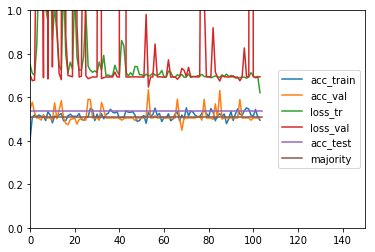

In [82]:
acc_te = log_dict['Test Accuracy'][0]
maj_class = log_dict['Majority Classifier Accuracy'][0]
acc_tr =  log_dict['Acc_tr']
acc_val = log_dict['Acc_val']
loss_tr = log_dict['Loss_tr']
loss_val = log_dict['Loss_val']
plt.plot(acc_tr,label='acc_train')
plt.plot(acc_val,label='acc_val')
plt.plot(loss_tr, label='loss_tr')
plt.plot(loss_val, label='loss_val')
plt.plot([0, len(acc_tr)], [acc_te, acc_te],label='acc_test')
plt.plot([0,len(acc_tr)],[maj_class,maj_class],label='majority')
plt.legend(loc='right')
plt.ylim([0, 1])
plt.xlim([0,150])
#plt.title('10 Tiles per Patient')
#plt.title('50 Tiles per Patient')

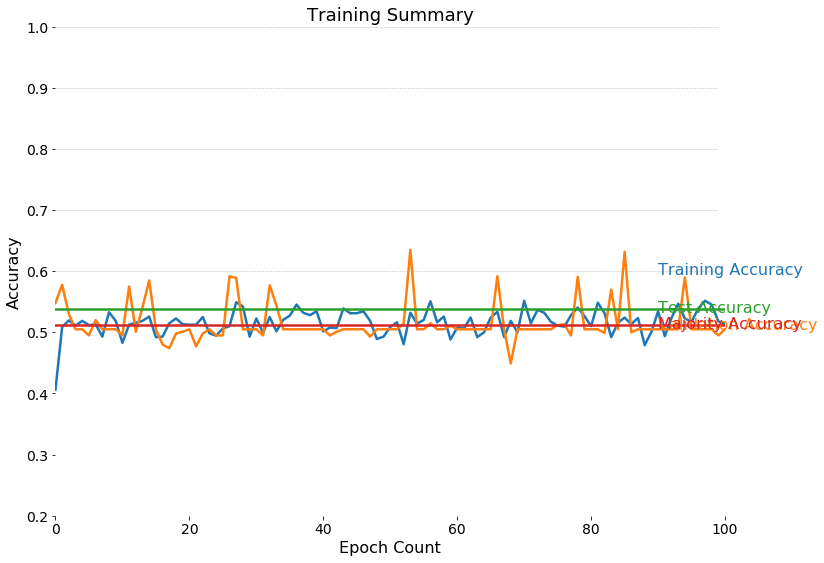

In [85]:
plt.figure(figsize=(12, 9))
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

epoch_count = 100

plt.ylim(0.2, 1.0)    
plt.xlim(0, epoch_count)  

plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.xlabel("Epoch Count", fontsize=16)  
plt.ylabel("Accuracy", fontsize=16)
plt.title("Training Summary", fontsize=18)

for y in [0.6, .7, .8, .9, 1.0]:    
    plt.plot(range(epoch_count), [y] * len(range(epoch_count)), "--", lw=0.5, color="black", alpha=0.3)

data_names = ['Training Accuracy', 'Validation Accuracy', 'ROC AUC Values']

plt.plot(range(len(acc_tr)), acc_tr, lw=2.5, color=np.array([31, 119, 180])/255.)
y_pos = acc_tr[-1] + .1
plt.text(epoch_count * 0.9, y_pos, 'Training Accuracy', fontsize=16, color=np.array([31, 119, 180])/255.)

plt.plot(range(len(acc_tr)), acc_val, lw=2.5, color=np.array([255, 127, 14])/255.)
y_pos = acc_val[-1] #- .025
plt.text(epoch_count * 0.9, y_pos, 'Validation Accuracy', fontsize=16, color=np.array([255, 127, 14])/255.)

plt.plot(range(len(acc_tr)), [acc_te] * len(acc_tr), lw=2.5, color=np.array([44, 160, 44])/255.)
y_pos = acc_te - .005
plt.text(epoch_count * 0.9, y_pos, 'Test Accuracy', fontsize=16, color=np.array([44, 160, 44])/255.)

default_acc = max(maj_class,1-maj_class)
plt.plot(range(len(acc_tr)), [default_acc] * len(acc_tr), lw=2.5, color=np.array([214, 39, 40])/255.)
y_pos = default_acc -.005
plt.text(epoch_count * 0.9, y_pos, 'Majority Accuracy', fontsize=16, color=np.array([214, 39, 40])/255.)

#plt.plot(range(len(acc_tr)), ROC_val, lw=2.5, color=np.array([44, 160, 44])/255.)
#y_pos = ROC_val[-1]# - .025
#plt.text(850, y_pos, 'ROC AUC (Validation)', fontsize=16, color=np.array([44, 160, 44])/255.)

plt.savefig("training_summary.png", bbox_inches="tight") 